In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

F:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_df=pd.read_csv("Train_dataset.csv")
train_df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,0.073375,-0.045532,-0.229372,-0.207142,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,-1.043259,-0.869941,-0.491516,-0.125797,0.743092,0.751626,-1.241449,0.511418,-0.777976,0.364207,0.835599,-0.324152,0.281048,0.628912,-0.429918,0.575425,0.307315,-0.288653,-0.944591,-0.459303,-0.123046,-0.884658,0.263813,0.302403,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.409369,0.912210,0.255978,-0.951226,-0.430030,-0.686776,-1.011871,-0.281887,0.311725,0.351000,0.215646,0.186019,0.289745,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.313867,0.208502,0.347273
1,1,-0.872563,-0.045532,0.451936,-0.091886,0.064238,0.750731,0.314667,-0.02618,-0.628316,-0.225716,1.954302,-1.188074,-0.03174,-0.411691,-0.543457,-0.071836,2.179628,-0.183465,0.390141,-0.491516,-0.125797,-0.508251,-0.661060,0.387047,-0.574410,0.663451,0.364207,-0.549162,-0.324152,0.281048,-1.128430,-1.518697,1.171992,0.307315,-0.288653,-0.641228,0.466465,-0.123046,-0.884658,0.263813,0.302403,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,0.795629,-0.318683,0.255978,0.600495,1.792425,-0.686776,0.070362,-0.281887,0.311725,-0.060731,0.215646,0.186019,0.289745,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.313867,0.208502,0.007288
2,2,0.073375,-0.045532,-0.093110,0.073480,0.064238,-1.378933,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,-0.977121,-0.821476,-0.491516,-0.125797,0.743092,0.751626,-1.241449,0.323060,-0.777976,0.364207,0.835599,-0.324152,0.281048,-0.249759,-0.429918,0.092907,0.307315,-0.288653,-0.301643,-0.313369,-0.123046,-0.884658,0.263813,0.302403,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.409369,-0.318683,0.255978,0.600495,1.792425,-0.686776,-0.928623,-0.281887,0.311725,0.631726,0.215646,0.186019,0.289745,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.313867,0.208502,0.536154
3,3,0.309859,-0.045532,-0.456474,-0.096897,0.064238,-1.378933,0.314667,-0.02618,-1.861302,-0.225716,-1.039872,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,1.800676,0.632464,-0.491516,-0.125797,1.055928,1.316701,0.387047,-0.574410,0.663451,0.364207,-1.933923,0.832969,-2.792584,0.628912,-1.518697,-0.499274,0.307315,-0.288653,-0.061670,-0.687324,-0.123046,0.265476,0.263813,0.302403,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,-0.409369,0.296763,0.255978,0.600495,-0.430030,1.586905,-0.886998,0.950313,1.650307,0.790804,0.215646,0.186019,0.289745,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,0.313867,-3.426284,-0.515281
4,4,0.073375,-0.045532,0.633618,0.375148,0.064238,-1.378933,0.314667,-0.02618,-0.628316,-0.225716,0.457215,-0.036289,-0.03174,-0.411691,1.026689,1.374795,-0.517200,-0.944052,-0.724547,-0.491516,-0.125797,0.743092,0.751626,-1.241449,1.364570,-0.777976,0.36420

In [3]:
X=train_df.iloc[:, 1:-1]
y=train_df.SalePrice
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.073375,-0.045532,-0.229372,-0.207142,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,-1.043259,-0.869941,-0.491516,-0.125797,0.743092,0.751626,-1.241449,0.511418,-0.777976,0.364207,0.835599,-0.324152,0.281048,0.628912,-0.429918,0.575425,0.307315,-0.288653,-0.944591,-0.459303,-0.123046,-0.884658,0.263813,0.302403,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.409369,0.912210,0.255978,-0.951226,-0.430030,-0.686776,-1.011871,-0.281887,0.311725,0.351000,0.215646,0.186019,0.289745,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.313867,0.208502
1,-0.872563,-0.045532,0.451936,-0.091886,0.064238,0.750731,0.314667,-0.02618,-0.628316,-0.225716,1.954302,-1.188074,-0.03174,-0.411691,-0.543457,-0.071836,2.179628,-0.183465,0.390141,-0.491516,-0.125797,-0.508251,-0.661060,0.387047,-0.574410,0.663451,0.364207,-0.549162,-0.324152,0.281048,-1.128430,-1.518697,1.171992,0.307315,-0.288653,-0.641228,0.466465,-0.123046,-0.884658,0.263813,0.302403,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,0.795629,-0.318683,0.255978,0.600495,1.792425,-0.686776,0.070362,-0.281887,0.311725,-0.060731,0.215646,0.186019,0.289745,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.313867,0.208502
2,0.073375,-0.045532,-0.093110,0.073480,0.064238,-1.378933,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,-0.977121,-0.821476,-0.491516,-0.125797,0.743092,0.751626,-1.241449,0.323060,-0.777976,0.364207,0.835599,-0.324152,0.281048,-0.249759,-0.429918,0.092907,0.307315,-0.288653,-0.301643,-0.313369,-0.123046,-0.884658,0.263813,0.302403,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.409369,-0.318683,0.255978,0.600495,1.792425,-0.686776,-0.928623,-0.281887,0.311725,0.631726,0.215646,0.186019,0.289745,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.313867,0.208502
3,0.309859,-0.045532,-0.456474,-0.096897,0.064238,-1.378933,0.314667,-0.02618,-1.861302,-0.225716,-1.039872,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,1.800676,0.632464,-0.491516,-0.125797,1.055928,1.316701,0.387047,-0.574410,0.663451,0.364207,-1.933923,0.832969,-2.792584,0.628912,-1.518697,-0.499274,0.307315,-0.288653,-0.061670,-0.687324,-0.123046,0.265476,0.263813,0.302403,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,-0.409369,0.296763,0.255978,0.600495,-0.430030,1.586905,-0.886998,0.950313,1.650307,0.790804,0.215646,0.186019,0.289745,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,0.313867,-3.426284
4,0.073375,-0.045532,0.633618,0.375148,0.064238,-1.378933,0.314667,-0.02618,-0.628316,-0.225716,0.457215,-0.036289,-0.03174,-0.411691,1.026689,1.374795,-0.517200,-0.944052,-0.724547,-0.491516,-0.125797,0.743092,0.751626,-1.241449,1.364570,-0.777976,0.364207,0.835599,-0.324152,0.281048,-2.007101,-0.429918,0.463568,0.307315,

In [4]:
y.head()

0    0.347273
1    0.007288
2    0.536154
3   -0.515281
4    0.869843
Name: SalePrice, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.1, random_state=10)

In [6]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [7]:
xgb.fit(X_train, y_train)

[16:35:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [8]:
xgb.score(X_test, y_test)

0.9043467908609167

In [9]:
y_pred=np.array(xgb.predict(X_test))
y_pred[:10]

array([-0.10014409,  0.24793503, -0.49308443, -0.36374682,  1.6929642 ,
        1.3860626 ,  0.68300295, -0.7893716 ,  0.03917605, -0.13310331],
      dtype=float32)

In [10]:
y_test[:10]

854    -0.137520
381     0.085989
816    -0.553057
577    -0.206776
35      1.612773
301     1.083907
688     2.657911
900    -0.893042
1251   -0.115484
860     0.113691
Name: SalePrice, dtype: float64

In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

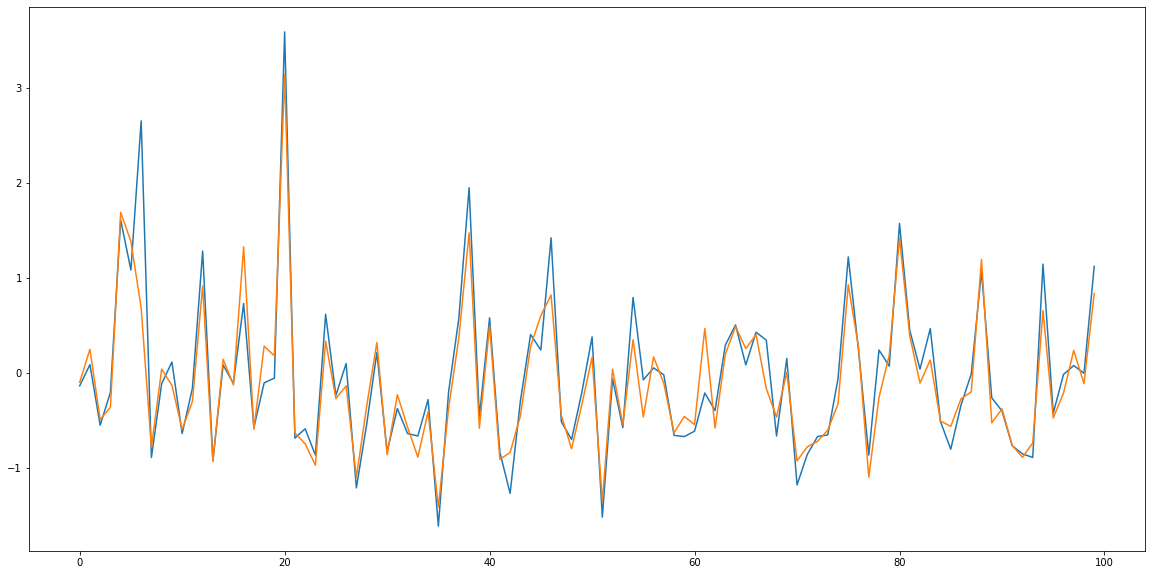

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(100), y_test[:100])
plt.plot(np.arange(100), y_pred[:100])

In [13]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8573386083083341

In [14]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8748976127244278

### Predicting Test Dataset

In [15]:
test_df=pd.read_csv("Test_dataset.csv")
test_df=test_df.iloc[:, 1:]
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.874711,-1.501777,0.555587,0.363929,0.06426,0.742620,0.31870,0.0,0.572445,-0.207992,-0.105672,-1.193183,0.028691,-0.426625,-0.431830,-0.751101,0.400766,0.413784,1.178391,-0.474315,-0.09948,0.683901,0.728946,0.382679,-0.570108,0.673548,0.388852,-0.533007,0.839283,0.290347,0.620425,0.696701,0.063295,-1.578965,0.517348,-0.650619,-0.370808,-0.084379,1.415522,0.272716,0.296079,-0.654561,-0.775254,-0.080483,-1.215588,-0.819568,-0.258526,-1.028720,-0.751040,-1.029543,-0.20391,0.770002,-0.918335,0.25839,-0.898055,-0.401521,-0.689701,0.736172,0.933169,-0.988013,1.185945,0.250409,0.186902,0.339114,0.366678,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.092244,-0.038281,1.713905,0.32475,0.201383
1,-0.874711,-0.039098,0.604239,0.897861,0.06426,-1.384637,0.31870,0.0,-1.950811,-0.207992,-0.105672,-0.056113,0.028691,-0.426625,-0.431830,-0.054877,0.400766,0.512398,1.320405,2.006065,-0.09948,1.096219,1.048229,-1.293983,0.041273,0.673548,0.388852,-0.533007,0.839283,0.290347,0.620425,-1.557149,1.063392,0.324927,-0.297903,-0.339378,0.639144,-0.084379,1.415522,0.272716,0.296079,0.433298,-0.775254,-0.080483,-0.323539,-0.819568,-0.258526,-1.028720,1.237648,0.175997,-0.20391,-0.422602,-0.255371,0.25839,-0.898055,-0.401521,-0.689701,0.852690,0.933169,-0.988013,-0.741213,0.250409,0.186902,0.339114,2.347867,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,19.730438,-0.038281,1.713905,0.32475,0.201383
2,0.061351,-0.039098,0.263676,0.809646,0.06426,-1.384637,0.31870,0.0,0.572445,-0.207992,-0.784114,-0.056113,0.028691,-0.426625,0.920188,-0.751101,-0.497418,-0.769577,-0.573119,-0.474315,-0.09948,0.683901,0.728946,0.382679,-0.570108,0.673548,0.388852,0.833702,-0.265874,0.290347,0.620425,-0.430224,0.773254,0.324927,-0.297903,-0.954994,-0.266876,-0.084379,0.269754,0.272716,0.296079,-0.574165,0.891944,-0.080483,0.294508,-0.819568,-0.258526,0.773083,1.237648,0.175997,-0.20391,0.770002,-0.255371,0.25839,0.647066,1.918553,-0.689701,-0.662038,-1.491575,0.301623,0.042559,0.250409,0.186902,0.339114,0.930495,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-1.140614,1.713905,0.32475,0.201383
3,0.061351,-0.039098,0.458284,0.032064,0.06426,-1.384637,0.31870,0.0,0.572445,-0.207992,-0.784114,-0.056113,0.028691,-0.426625,0.920188,-0.054877,0.400766,-0.802448,-0.573119,-0.474315,-0.09948,0.683901,0.728946,-1.293983,-0.456889,0.673548,0.388852,0.833702,0.839283,0.290347,0.620425,-0.430224,0.357829,0.324927,-0.297903,-0.527038,-0.271395,-0.084379,-0.876014,0.272716,0.296079,-0.579190,0.837243,-0.080483,0.243004,-0.819568,-0.258526,0.773083,1.237648,0.175997,-0.20391,-0.422602,0.407593,0.25839,0.647066,-0.401521,-0.689701,-0.700877,-1.491575,0.301623,-0.012766,0.250409,0.186902,0.339114,2.089451,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,1.713905,0.32475,0.201383
4,1.465443,-0.039098,-1.244533,-0.971808,0.06426,-1.384637,-2.53396,0.0,0.572445,-0.207992,1.590431,-0.056113,0.028691,2.866737,-0.431830,1.337571,-0.497418,-0.605221,-0.289090,-0.474315,-0.09948,-0.965374,-1.186753,0.382679,-0.570108,-0.734340,0.388852,0.833702,-0.265874,0.290347,0.620425,-1.557149,-0.387298,0.324927,-0.297903,1.058917,0.528434,-0.084379,-0.876014,0.272716,

In [16]:
ans_df=pd.read_csv("House Datasets/sample_submission.csv")
index_df=pd.DataFrame(ans_df.iloc[:, 0], columns=['Id'])
ans_df.drop("Id", axis=1, inplace=True)
ans_df.head()

,SalePrice
0,169277.052498
1,187758.393989
2,183583.683570
3,179317.477511
4,150730.079977


In [17]:
index_df.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [18]:
prediction=xgb.predict(test_df)
prediction[:10]

array([-0.6649705 , -0.28951436, -0.06996799,  0.08376995,  0.32218578,
       -0.07328755, -0.13224387, -0.14058602,  0.04391727, -0.6701268 ],
      dtype=float32)

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc=StandardScaler()
sc

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
real_price=sc.fit_transform(ans_df).reshape(1459)

In [21]:
ans_df.head(10)

,SalePrice
0,169277.052498
1,187758.393989
2,183583.683570
3,179317.477511
4,150730.079977
5,177150.989247
6,172070.659229
7,175110.956520
8,162011.698832
9,160726.247831


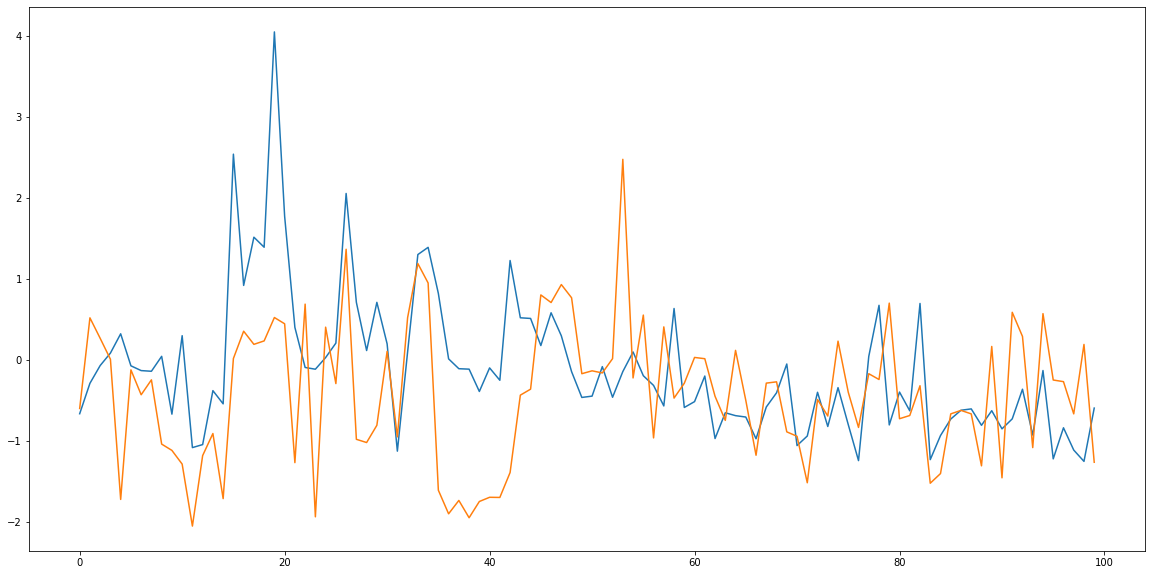

In [22]:
plt.figure(figsize=(20, 10))
plt.plot(prediction[:100])
plt.plot(real_price[:100])

In [23]:
predicted_price=sc.inverse_transform(prediction)
predicted_price

array([168203.5 , 174403.27, 178028.56, ..., 176111.44, 167686.03,
       191879.05], dtype=float32)

In [24]:
ans_df['Predicted Price']=predicted_price
ans_df.head(3)

,SalePrice,Predicted Price
0,169277.052498,168203.500000
1,187758.393989,174403.265625
2,183583.683570,178028.562500


In [25]:
result=pd.concat(
    [index_df, ans_df], axis=1
)
result.head(10)

,Id,SalePrice,Predicted Price
0,1461,169277.052498,168203.500000
1,1462,187758.393989,174403.265625
2,1463,183583.683570,178028.562500
3,1464,179317.477511,180567.187500
4,1465,150730.079977,184504.062500
5,1466,177150.989247,177973.750000
6,1467,172070.659229,177000.218750
7,1468,175110.956520,176862.468750
8,1469,162011.698832,179909.109375
9,1470,160726.247831,168118.359375


In [26]:
result.to_csv("Final_Price_LIST_with_prediction.csv")